# Conversion of .mat files to .csv files

In [82]:
from scipy.io import loadmat
import pandas as pd
import numpy as np

data = loadmat(r"C:\Users\Admin\OneDrive\Desktop\ip.mat")
x = data["indian_pines_gt"]
print(data)  
print(data.keys())
df = pd.DataFrame(x)
df.to_csv(r"C:\Users\Admin\OneDrive\Desktop\ip.csv")


{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Fri May 20 18:25:41 2011', '__version__': '1.0', '__globals__': [], 'indian_pines_gt': array([[3, 3, 3, ..., 0, 0, 0],
       [3, 3, 3, ..., 0, 0, 0],
       [3, 3, 3, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}
dict_keys(['__header__', '__version__', '__globals__', 'indian_pines_gt'])


# Importing Libraries

In [83]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA
import tensorflow as tf
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import OneHotEncoder

# Importing Dataset

In [84]:
dataset = pd.read_csv('ip.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [85]:
dataset.shape

(145, 146)

In [86]:
dataset.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,135,136,137,138,139,140,141,142,143,144
0,0,3,3,3,3,3,3,3,3,3,...,0,0,0,0,0,0,0,0,0,0
1,1,3,3,3,3,3,3,3,3,3,...,0,0,0,0,0,0,0,0,0,0
2,2,3,3,3,3,3,3,3,3,3,...,0,0,0,0,0,0,0,0,0,0
3,3,3,3,3,3,3,3,3,3,3,...,0,0,0,0,0,0,0,0,0,0
4,4,3,3,3,3,3,3,3,3,3,...,0,0,0,0,0,0,0,0,0,0


# Training the data

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [88]:
from sklearn.preprocessing import StandardScaler
ss_X = StandardScaler()
X_train = ss_X.fit_transform(X_train)
X_test = ss_X.transform(X_test)

In [89]:
X_train.shape

(116, 145)

# Testing the data

In [90]:
from sklearn.decomposition import KernelPCA

kpca = KernelPCA(n_components=2)
X_train_kpca = kpca.fit_transform(X_train)
X_test_kpca = kpca.transform(X_test)


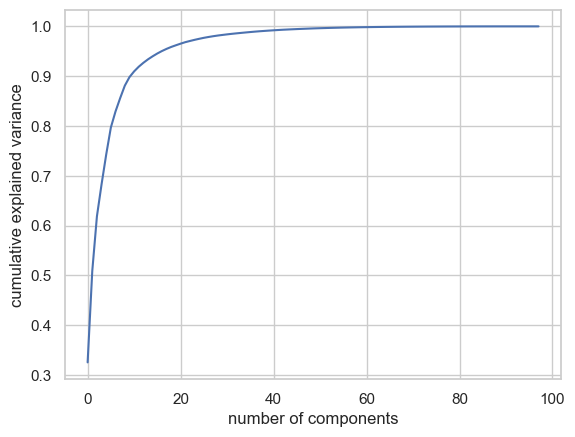

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.325188,0.325188
1,0.508798,0.183610
2,0.618519,0.109721
3,0.682859,0.064340
4,0.742834,0.059975
5,0.796937,0.054103
6,0.829125,0.032188
7,0.855899,0.026774
8,0.880932,0.025032
9,0.898072,0.017141


In [98]:
from sklearn.decomposition import KernelPCA
kpca_test = KernelPCA()
kpca_test = kpca_test.fit_transform(X_train)
explained_variance = np.var(kpca_test, axis=0)
explained_variance_ratio = explained_variance / np.sum(explained_variance)

sns.set(style='whitegrid')
plt.plot(np.cumsum(explained_variance_ratio))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
display(plt.show())

evr = explained_variance_ratio
cvr = np.cumsum(explained_variance_ratio)

kpca_df = pd.DataFrame()
kpca_df['Cumulative Variance Ratio'] = cvr
kpca_df['Explained Variance Ratio'] = evr
display(kpca_df.head(15))

In [117]:
X_test.shape

(29, 145)

In [126]:
import tensorflow as tf
from tensorflow.keras.layers import Dense

model = tf.keras.Sequential([
    Dense(512, activation='relu', input_shape=(2,)),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(1, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [130]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
y_train_encoded = encoder.fit_transform(y_train.reshape(-1, 1)).toarray()
print(y_train_encoded.shape)

# Training the model
model.fit(X_train_kpca, y_train_encoded, epochs=20, batch_size=32)


(116, 1)
Epoch 1/20
4/4 [==============================] - 0s 14ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 2/20
4/4 [==============================] - 0s 16ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 3/20
4/4 [==============================] - 0s 15ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 4/20
4/4 [==============================] - 0s 15ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 5/20
4/4 [==============================] - 0s 14ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 6/20
4/4 [==============================] - 0s 16ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 7/20
4/4 [==============================] - 0s 15ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 8/20
4/4 [==============================] - 0s 16ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 9/20
4/4 [==============================] - 0s 12ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 10/20
4/4 [==============================] - 0s 14ms/step - loss: 0.0000e+00

# Evaluation

In [129]:
# Evaluate the model on the test data
y_test_encoded = encoder.transform(y_test.reshape(-1, 1)).toarray()
test_loss, test_accuracy = model.evaluate(X_test_kpca, y_test_encoded)

print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')


1/1 [==============================] - 0s 66ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Test Loss: 0.0000
Test Accuracy: 1.0000
